# Exploratory Data Analysis (EDA)
---
### **Business Questions:**
1. What is the most expensive zipcode?

2. Does the distance to the nearest hub affect the price?

3. What is the range of price per foot square for every locality?

4. Which property type is the most common in the dataset?

5. How does the number of bedrooms and bathrooms correlate with the price? 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"../data/cleaned/NY-House-Cleaned-Dataset.csv", dtype={"zipcode": str})

In [23]:
df.head()

,type,price,beds,bath,propertysqft,locality,zipcode,distance_to_center,distance_to_wall_street
0,Condo,315000,2,2,1400.0,Manhattan,10022,0.934921,6.790446
1,Condo,195000000,7,10,17545.0,Manhattan,10019,0.912529,7.112466
2,House,260000,4,2,2015.0,Manhattan,10312,29.984754,24.150407
3,Condo,69000,3,1,445.0,Manhattan,10022,0.929318,6.800200
4,House,690000,5,2,4004.0,Manhattan,11238,9.648498,5.495501


In [24]:
df.describe()

,price,beds,bath,propertysqft,distance_to_center,distance_to_wall_street
count,3.958000e+03,3958.000000,3958.000000,3958.000000,3958.000000,3958.000000
mean,1.763918e+06,3.329965,2.387317,1976.332744,12.014675,12.575431
std,4.583237e+06,2.738316,2.077792,1793.479695,7.173065,6.216166
min,6.000000e+04,1.000000,1.000000,250.000000,0.165268,0.046099
25%,4.799000e+05,2.000000,1.000000,964.000000,5.499239,8.152002
50%,8.000000e+05,3.000000,2.000000,1440.000000,12.589410,11.877026
75%,1.463750e+06,4.000000,3.000000,2250.000000,16.869800,16.891749
max,1.950000e+08,50.000000,50.000000,33000.000000,36.220501,30.461940


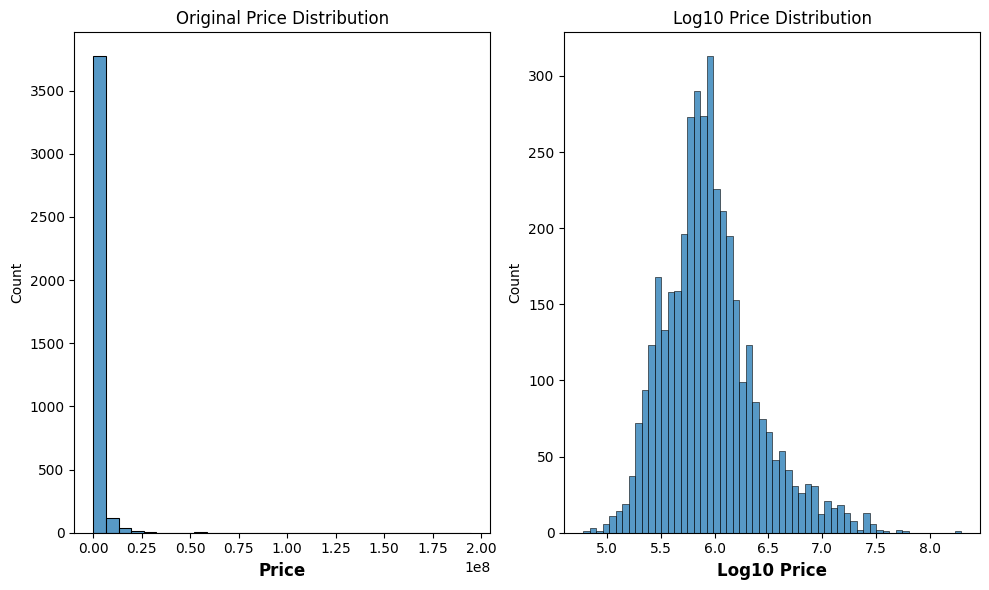

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(x=df['price'], ax=axes[0], bins=30)
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price', fontsize=12, weight='bold')
sns.histplot(x=np.log10(df['price']), ax=axes[1])
axes[1].set_title('Log10 Price Distribution')
axes[1].set_xlabel('Log10 Price', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

<Axes: >

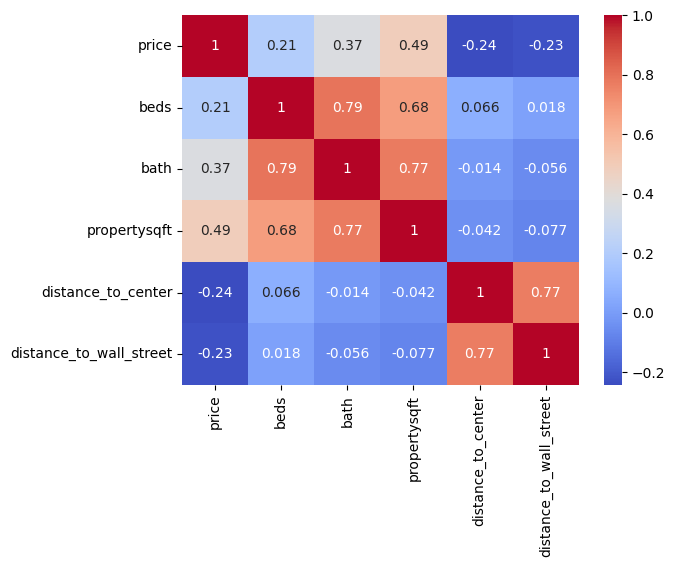

In [26]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')

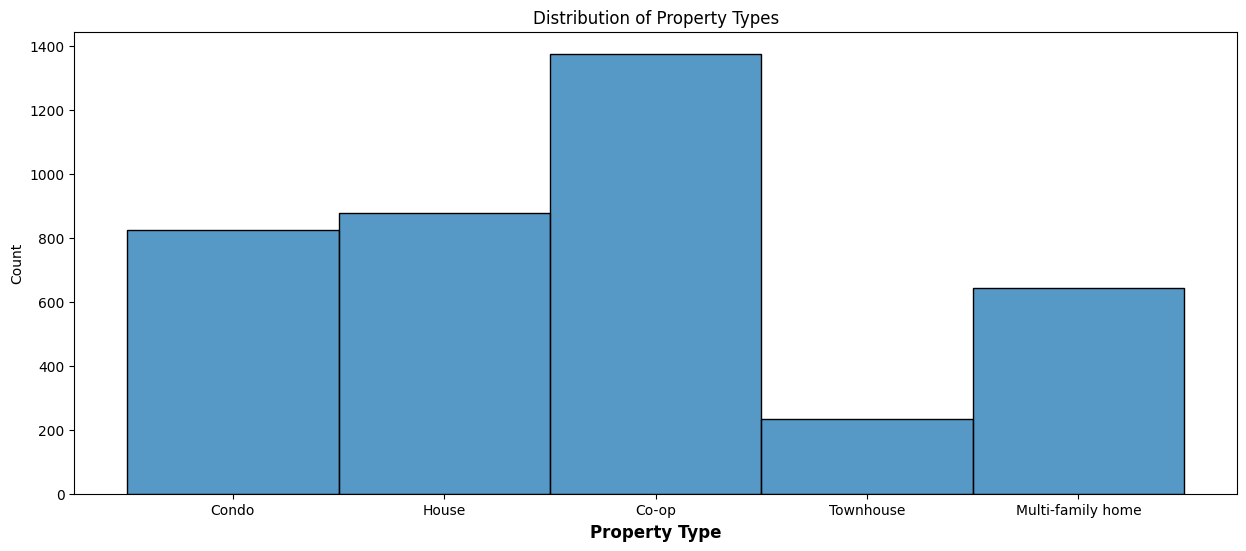

In [27]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x="type", bins=50)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type', fontsize=12, weight='bold')
plt.show()

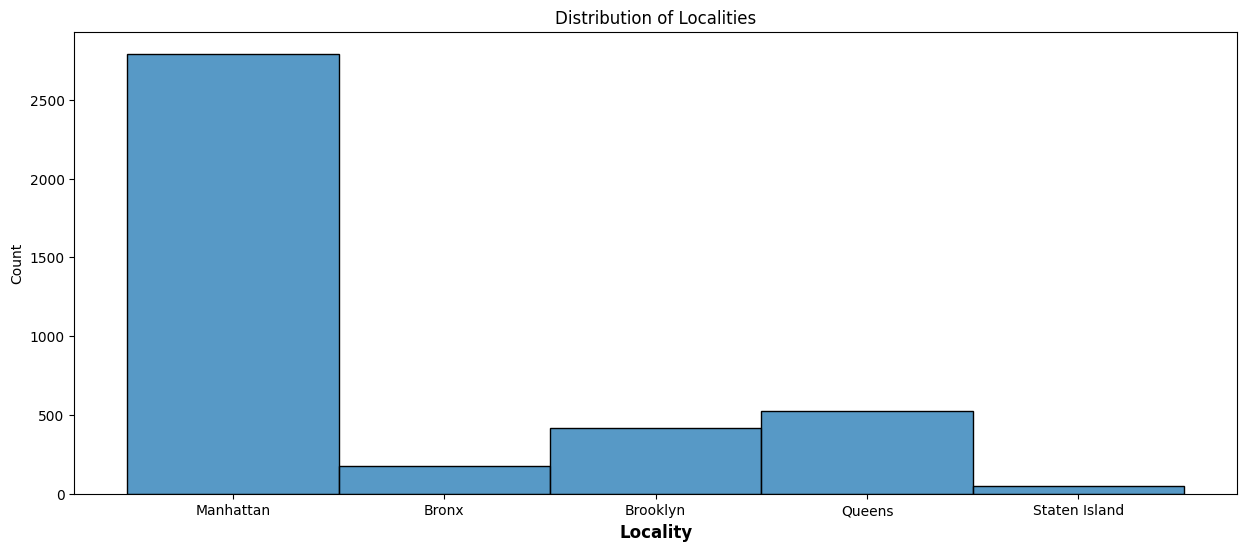

In [28]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x="locality", bins=50)
plt.title('Distribution of Localities')
plt.xlabel('Locality', fontsize=12, weight='bold')
plt.show()

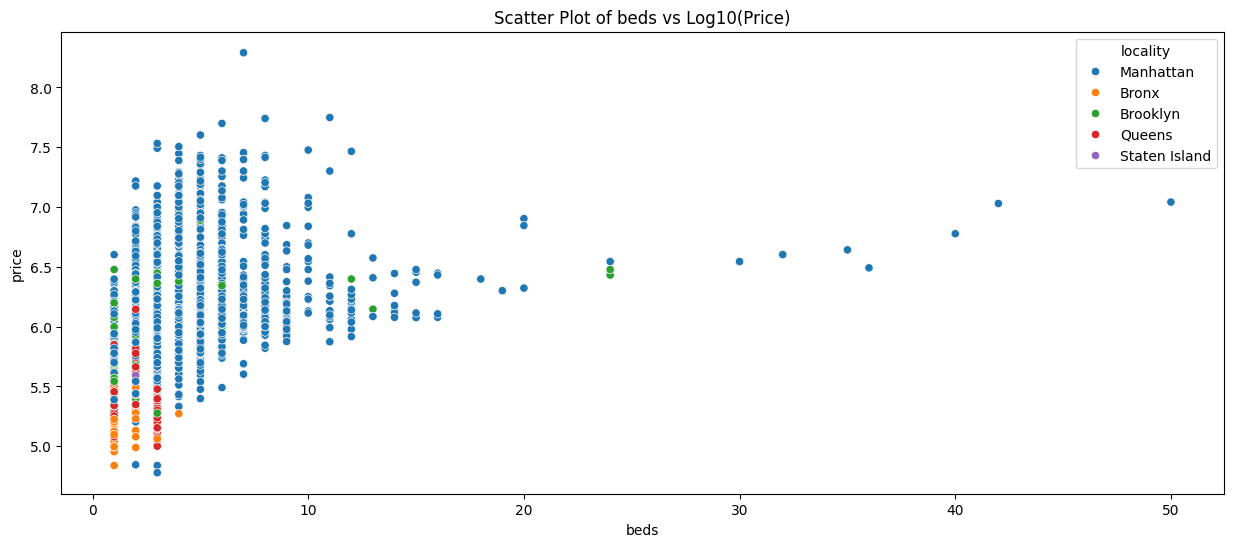

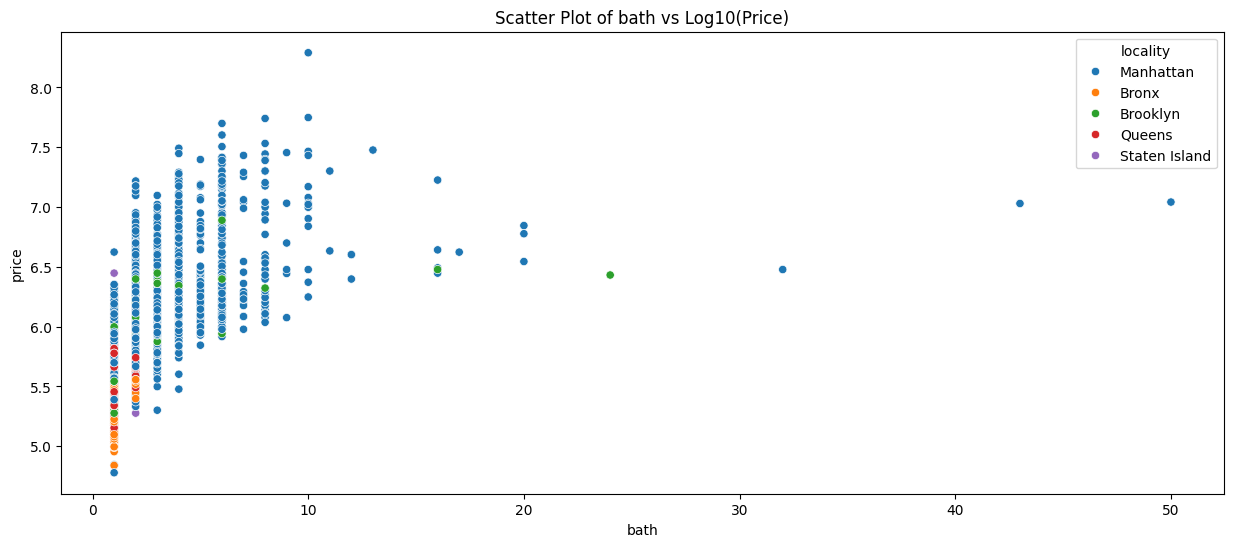

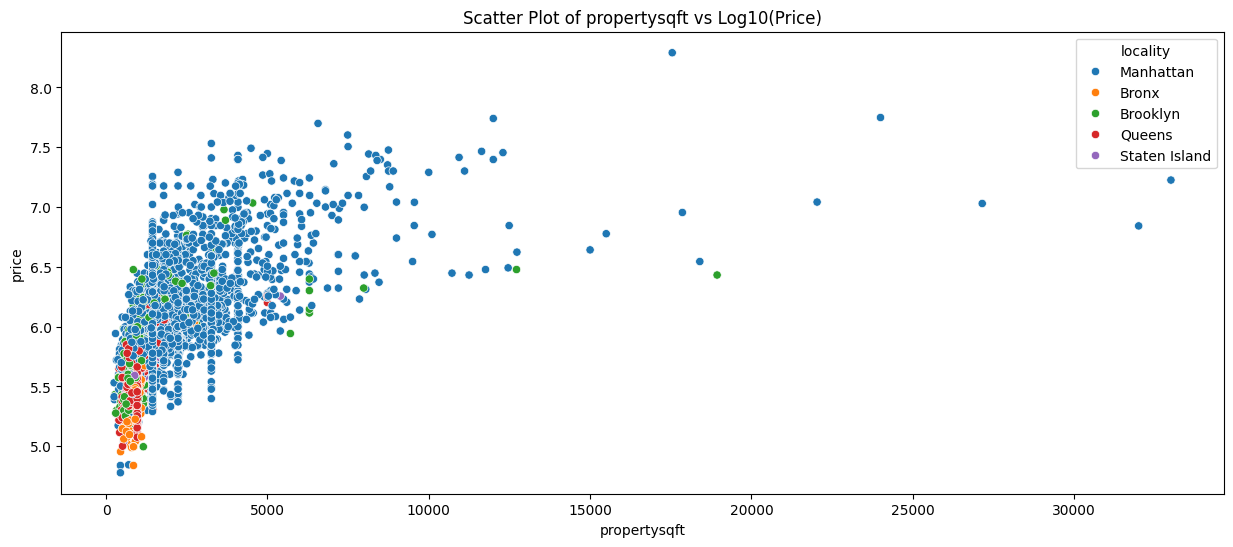

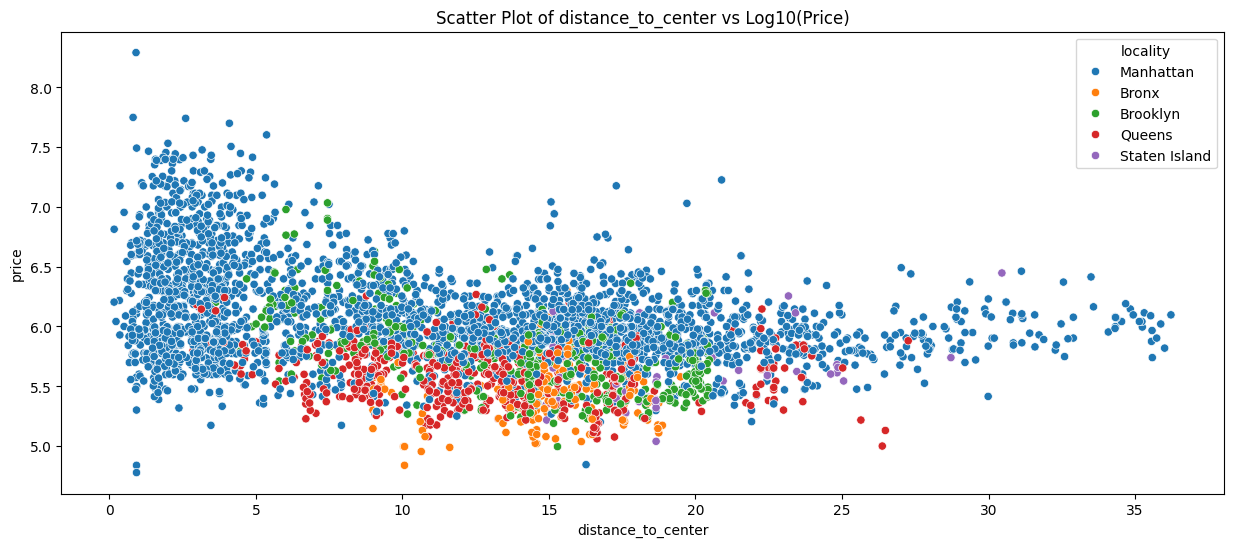

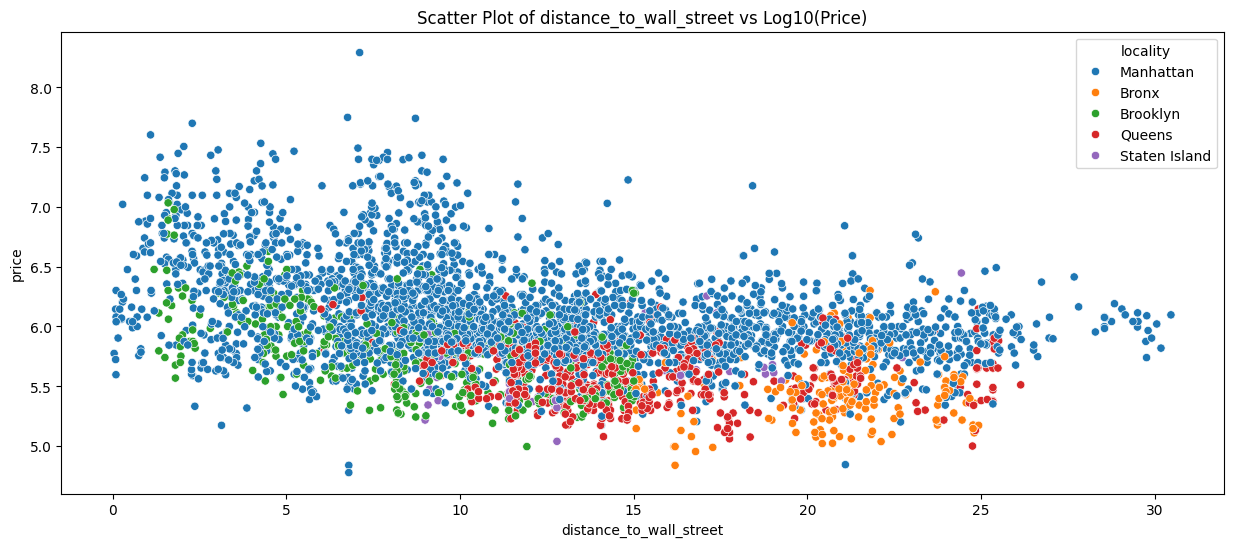

In [29]:
for col in df.select_dtypes(include=[np.number]).columns:
    if col == 'price':
        continue
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=df[col], y=np.log10(df['price']), hue=df['locality'])
    plt.title(f'Scatter Plot of {col} vs Log10(Price)')
    plt.show()

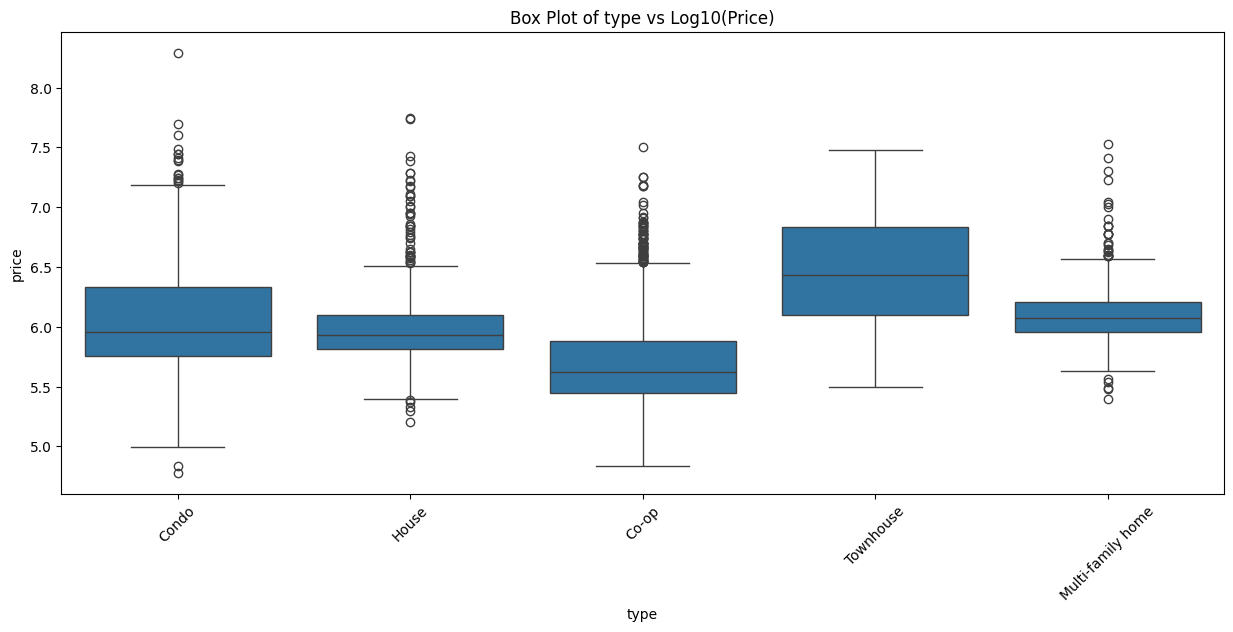

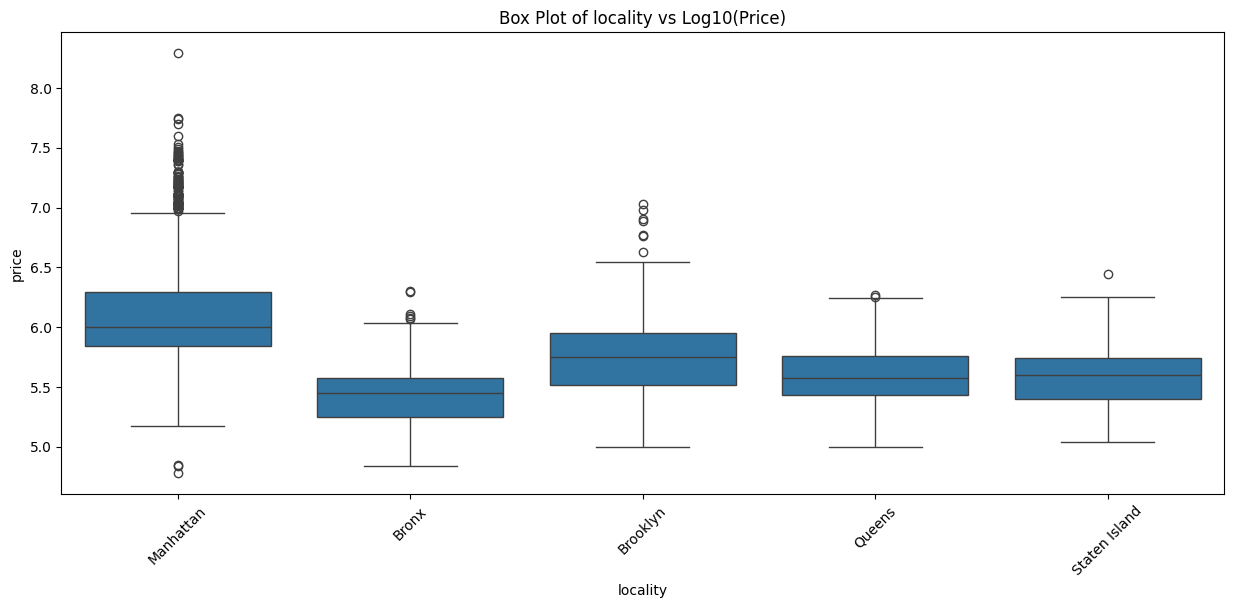

In [30]:
for col in df.select_dtypes(include=np.object_).columns:
    if col == 'zipcode':
        continue
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df[col], y=np.log10(df['price']))
    plt.title(f'Box Plot of {col} vs Log10(Price)')
    plt.xticks(rotation=45)
    plt.show()

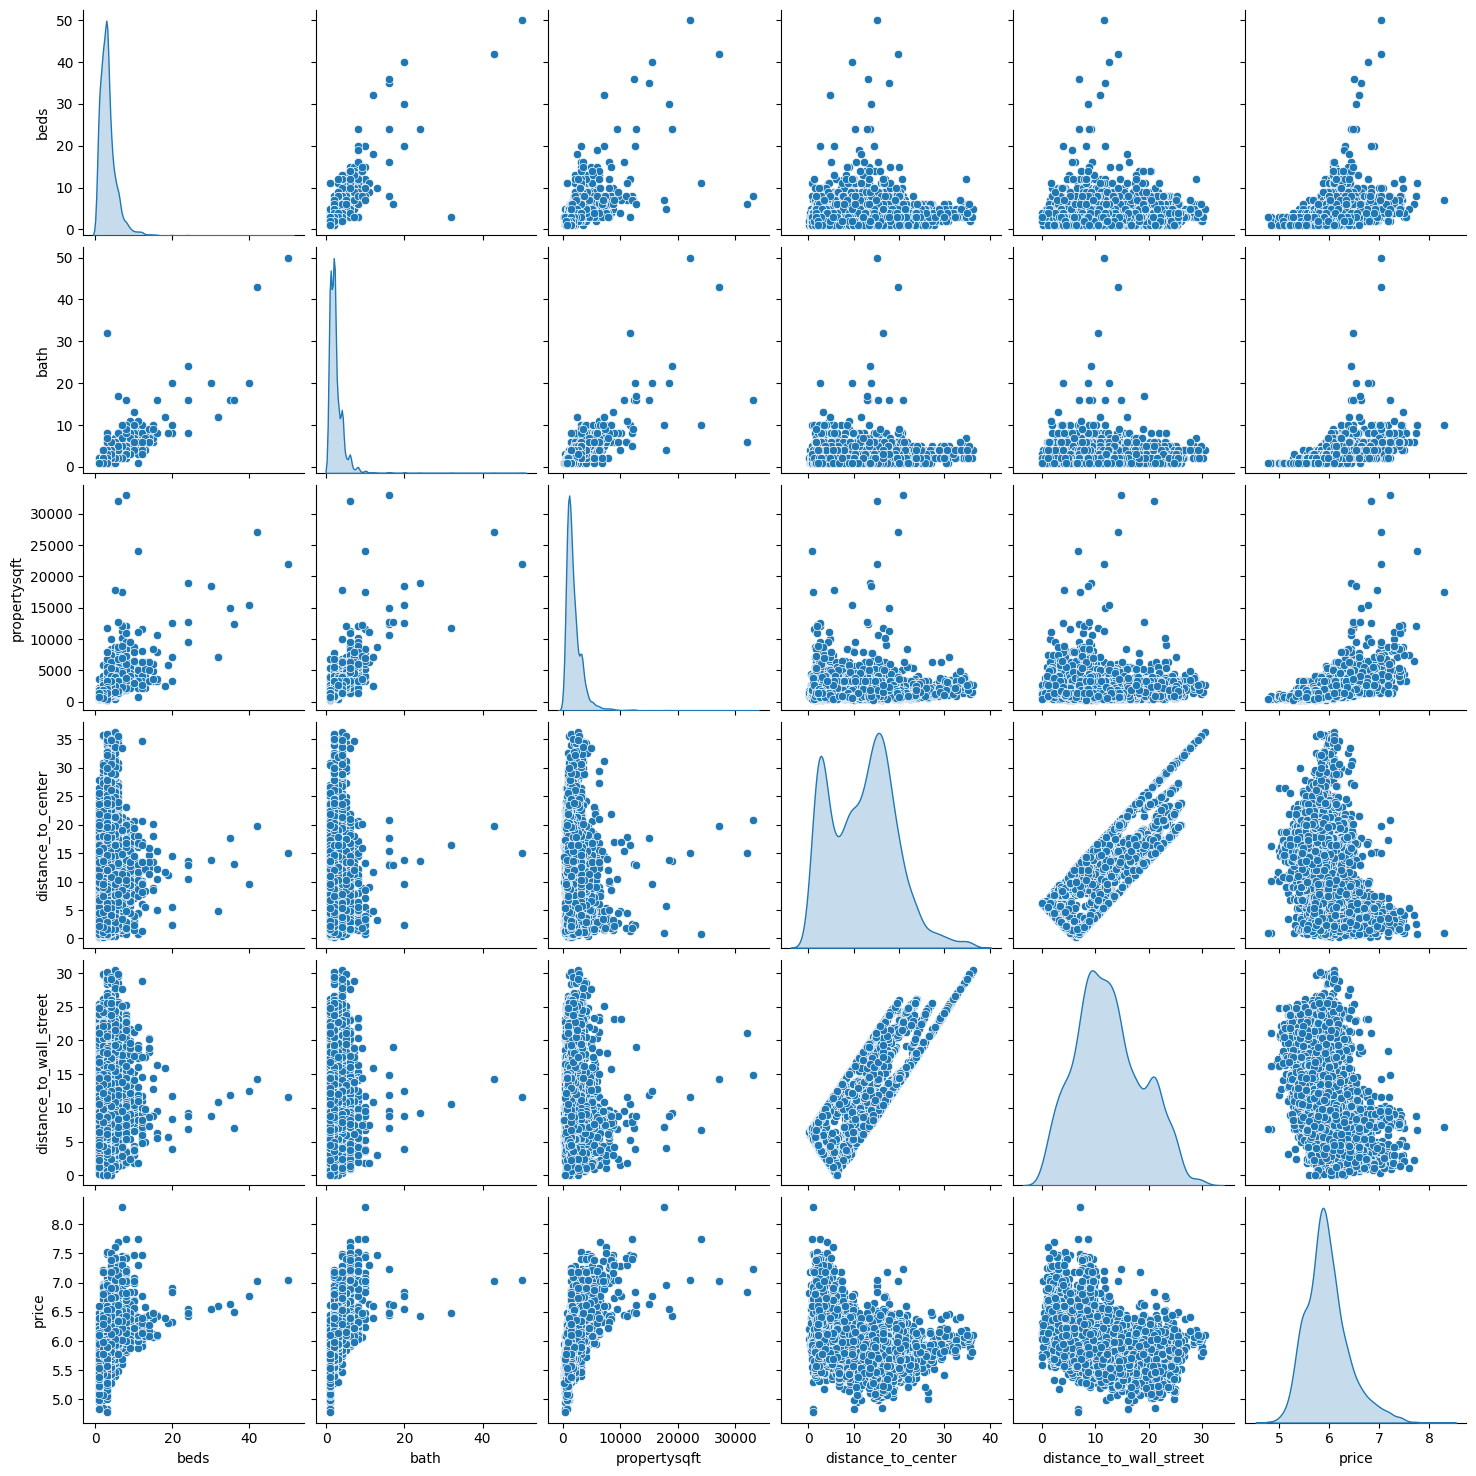

In [31]:
sns.pairplot(df.select_dtypes(include=[np.number]).drop(columns=['price']).assign(price=np.log10(df['price'])), diag_kind='kde')

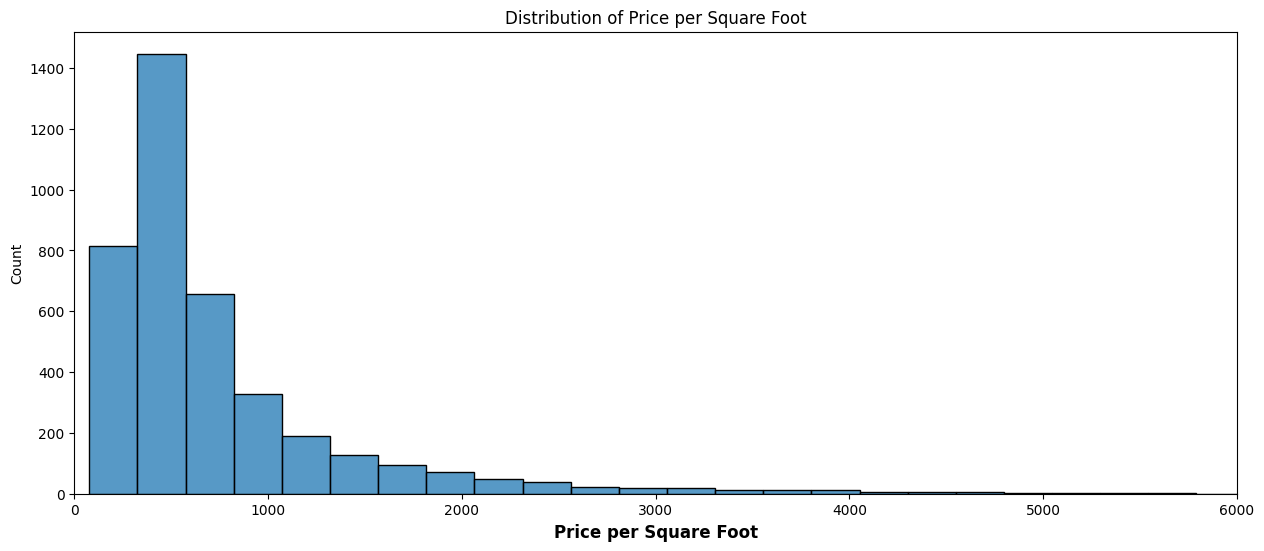

In [32]:
df["price_per_sqft"] = df["price"] / df["propertysqft"]
plt.figure(figsize=(15, 6))
sns.histplot(x=df['price_per_sqft'], bins=50)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot', fontsize=12, weight='bold')
plt.xlim(0, 6000)
plt.show()

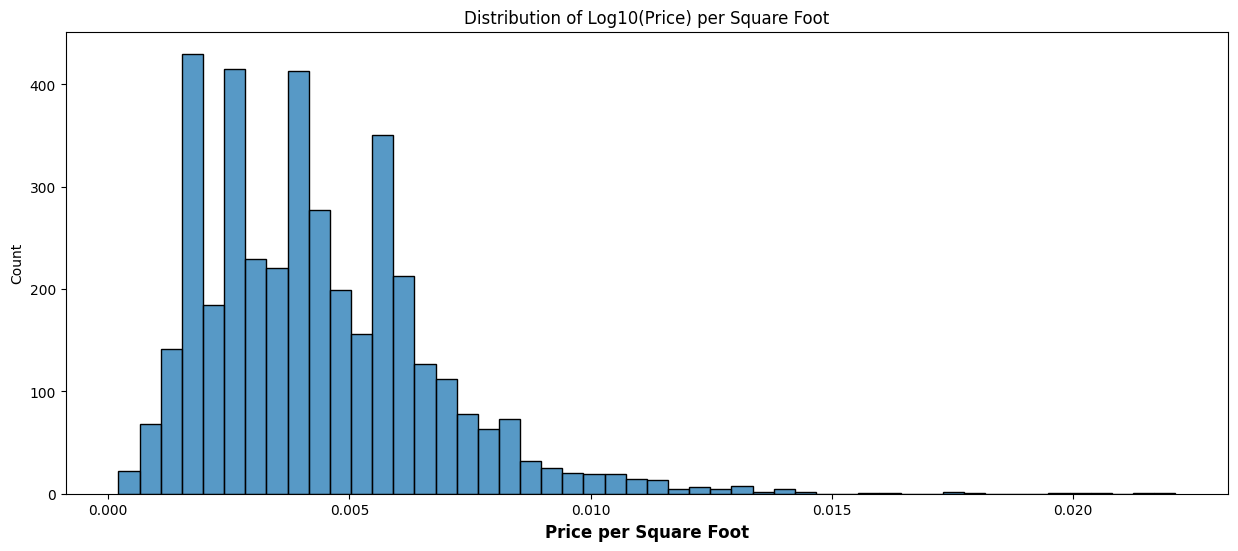

In [33]:
df["price_per_sqft"] = np.log10(df["price"]) / df["propertysqft"]
plt.figure(figsize=(15, 6))
sns.histplot(x=df['price_per_sqft'], bins=50)
plt.title('Distribution of Log10(Price) per Square Foot')
plt.xlabel('Price per Square Foot', fontsize=12, weight='bold')
# plt.xlim(0, 0.01)
plt.show()

### **Answering Questions:**

1. What is the most expensive zipcode?

2. Does the distance to the nearest hub affect the price?

3. What is the range of price per foot square for every locality?

4. Which property type is the most common in the dataset?

5. How does the number of bedrooms and bathrooms correlate with the price? 

#### What is the most expensive zipcode?

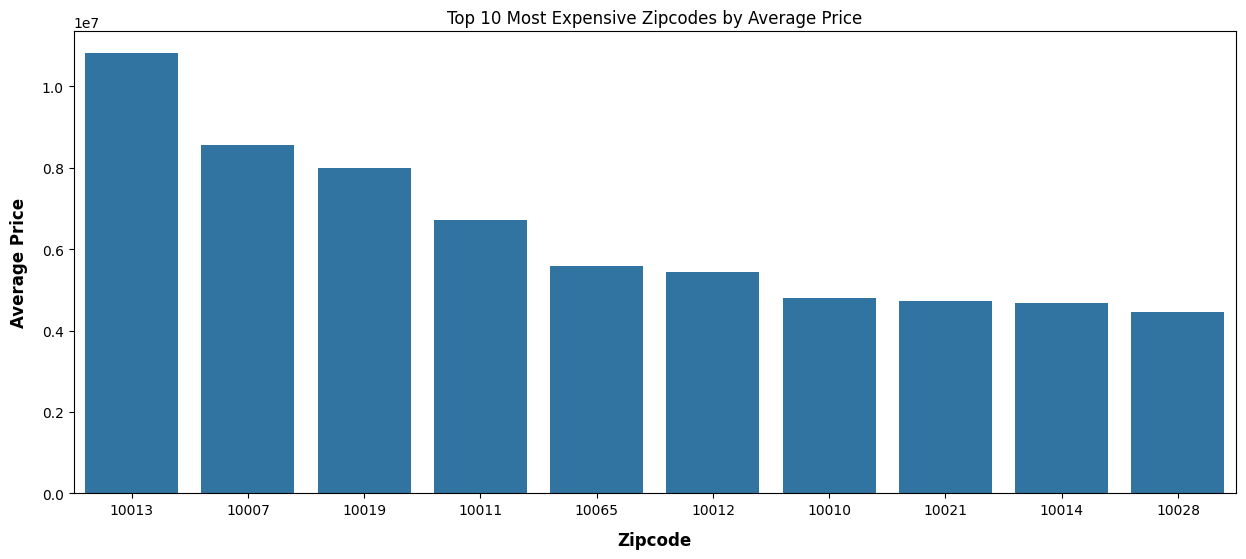

In [34]:
zipcode_group = df.groupby('zipcode')['price'].mean().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=zipcode_group.index, y=zipcode_group.values)
plt.title('Top 10 Most Expensive Zipcodes by Average Price')
plt.xlabel('Zipcode', fontsize=12, weight='bold', labelpad=10)
plt.ylabel('Average Price', fontsize=12, weight='bold', labelpad=10)
plt.show()

#### Does the distance to the nearest hub affect the price?

Correlation between distance to nearest hub and price: -0.2531402623786098


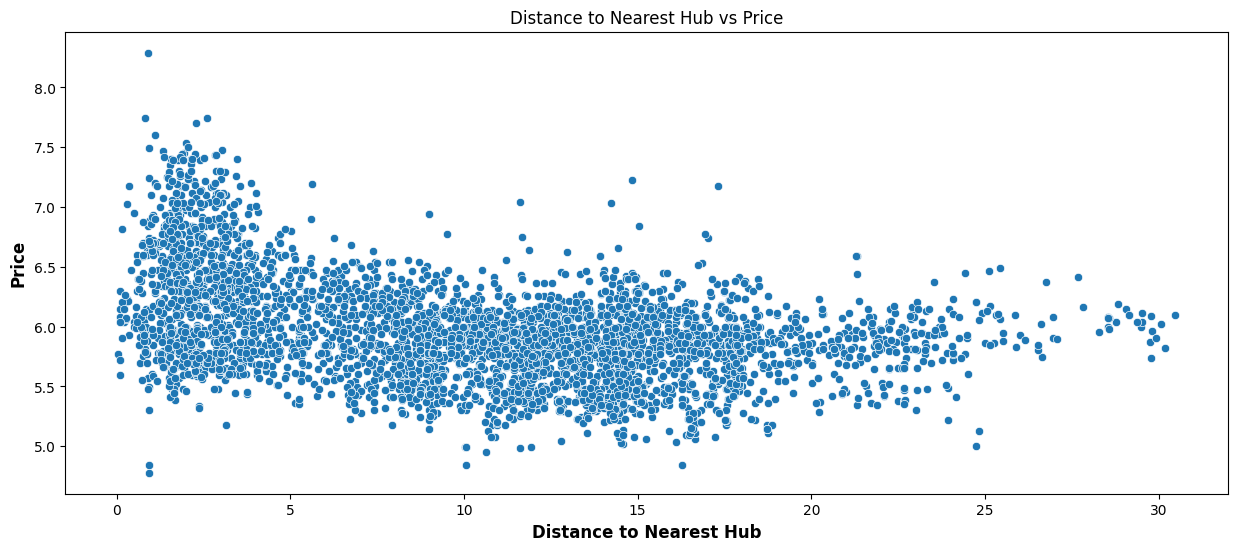

In [35]:
nearest_hub = df[["distance_to_center", "distance_to_wall_street"]].min(axis=1)
nearest_hub_price_corr = nearest_hub.corr(df["price"])

print(f"Correlation between distance to nearest hub and price: {nearest_hub_price_corr}")
plt.figure(figsize=(15, 6))
sns.scatterplot(x=nearest_hub, y=np.log10(df['price']))
plt.title('Distance to Nearest Hub vs Price')
plt.xlabel('Distance to Nearest Hub', fontsize=12, weight='bold')
plt.ylabel('Price', fontsize=12, weight='bold')
plt.show()

#### What is the range of price per foot square for every locality?

In [36]:
df["price_per_sqft"] = df["price"] / df["propertysqft"]
locality_price_per_sqft = df.groupby('locality')['price_per_sqft']
print(locality_price_per_sqft.max())
print(locality_price_per_sqft.min())

locality
Bronx             1364.640884
Brooklyn          3544.378698
Manhattan        12500.000000
Queens            1317.000000
Staten Island     1555.555556
Name: price_per_sqft, dtype: float64
locality
Bronx             81.176471
Brooklyn          85.714286
Manhattan         76.640098
Queens           119.294606
Staten Island    195.652174
Name: price_per_sqft, dtype: float64


C:\Users\start\AppData\Local\Temp\ipykernel_14980\776558596.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\start\AppData\Local\Temp\ipykernel_14980\776558596.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


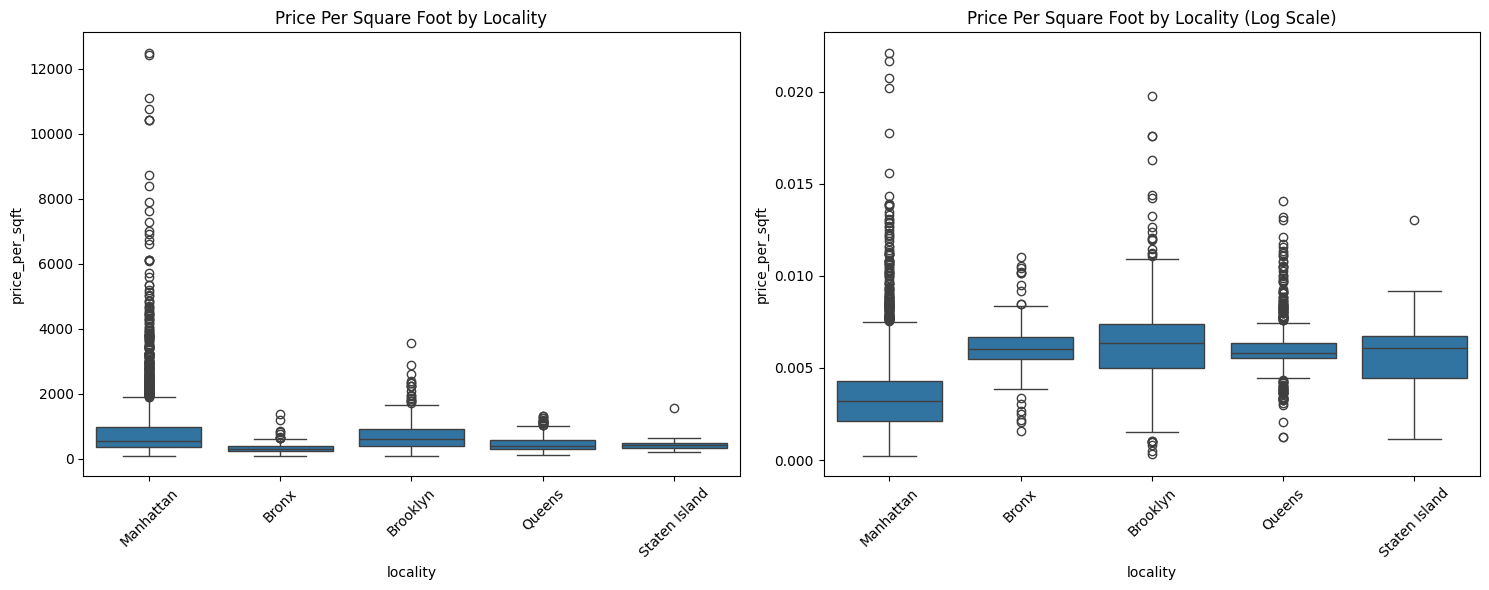

In [37]:
figure, axes = plt.subplots(1, 2, figsize=(15, 6))
df["price_per_sqft"] = df["price"] / df["propertysqft"]
sns.boxplot(x='locality', y='price_per_sqft', data=df, ax=axes[0])
axes[0].set_title('Price Per Square Foot by Locality')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

df["price_per_sqft"] = np.log10(df["price"]) / df["propertysqft"]
sns.boxplot(x='locality', y='price_per_sqft', data=df, ax=axes[1])
axes[1].set_title('Price Per Square Foot by Locality (Log Scale)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

#### Which property type is the most common in the dataset?

In [41]:
df["type"].value_counts()

type
Co-op                1377
House                 879
Condo                 825
Multi-family home     643
Townhouse             234
Name: count, dtype: int64

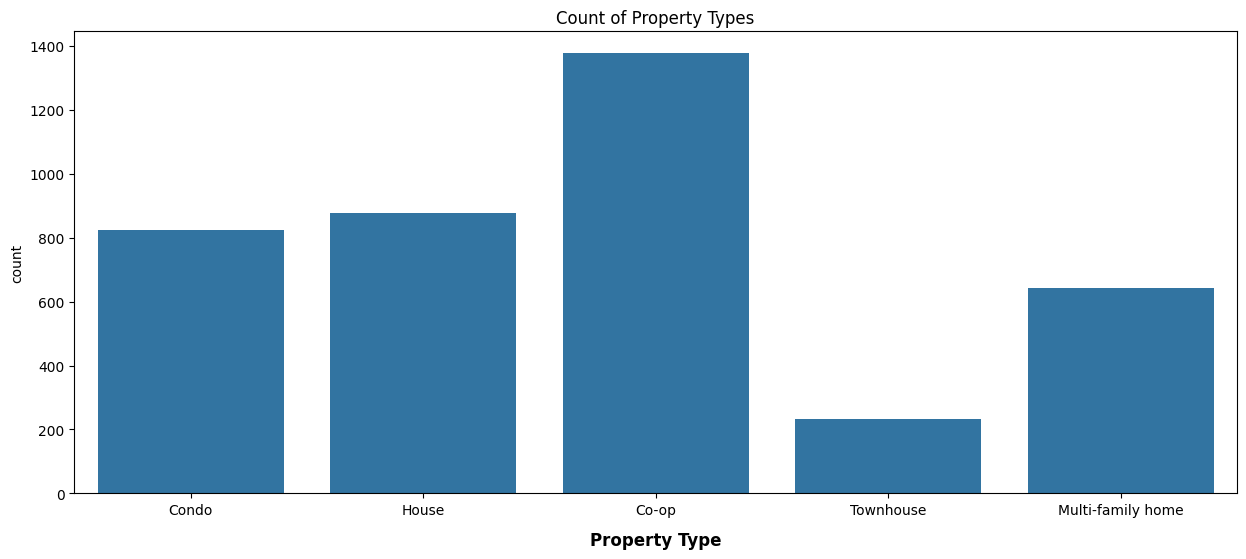

In [48]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="type")
plt.title('Count of Property Types')
plt.xlabel('Property Type', fontsize=12, weight='bold', labelpad=10)
plt.show()

#### How does the number of bedrooms and bathrooms correlate with the price? 

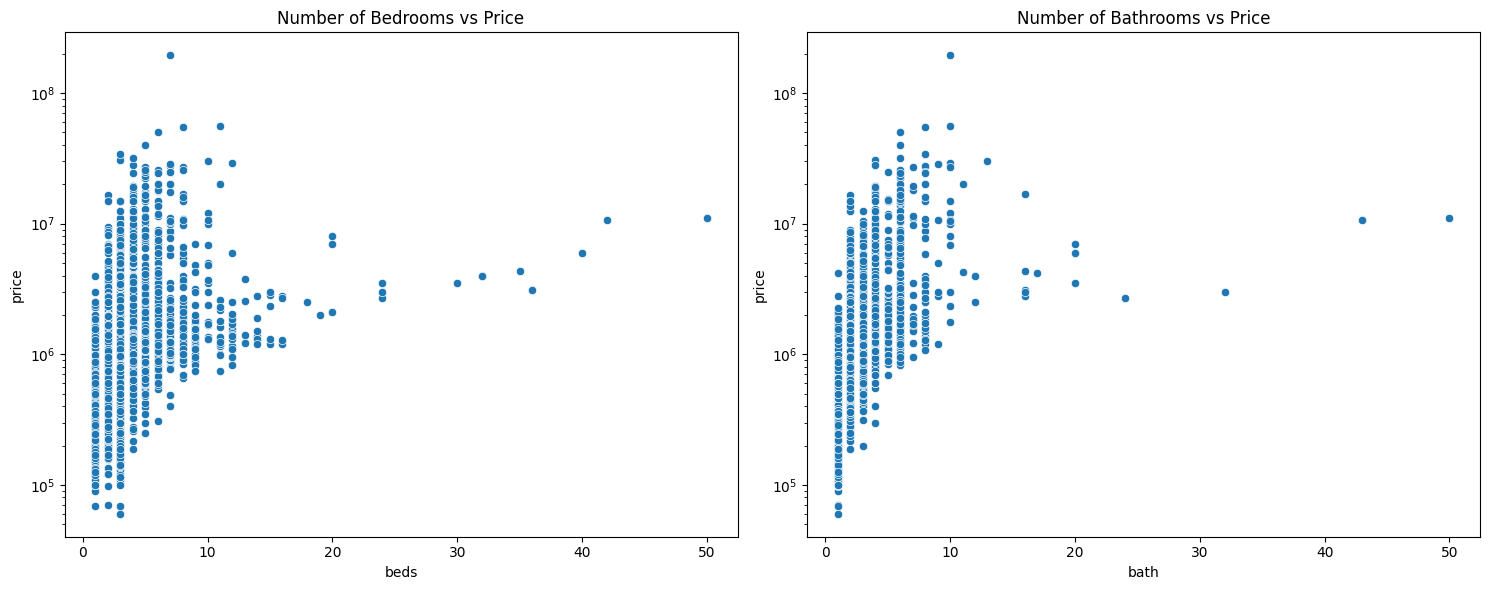

In [62]:
figure, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x="beds", y="price", ax=axes[0], data=df)
axes[0].set_title('Number of Bedrooms vs Price')
axes[0].set_yscale('log')
sns.scatterplot(x="bath", y="price", ax=axes[1], data=df)
axes[1].set_title('Number of Bathrooms vs Price')
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

### **Next steps:**
1. Convert categorical variables ('type', 'locality') using one-hot encoding
2. Convert categorical variables ('zipcode') using target encoding
3. Split data into training, validation, and testing sets